In [69]:
import pandas as pd
from math import sin, cos, asin, sqrt, pi
import matplotlib.pyplot as plt


In [8]:
def haversine_miles(lat1, lon1, lat2, lon2):
    """Calculates the distance between two points on earth using the
    harversine distance (distance between points on a sphere)
    See: https://en.wikipedia.org/wiki/Haversine_formula

    :param lat1: latitude of point 1
    :param lon1: longitude of point 1
    :param lat2: latitude of point 2
    :param lon2: longitude of point 2
    :return: distance in miles between points
    """
    lat1, lon1, lat2, lon2 = (a/180*pi for a in [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(min(1, sqrt(a)))
    d = 3956 * c
    return d

In [21]:
with open("Location_Years.csv") as f:
    location = pd.read_csv(f)
df = location[['Year','Lat', "Lon"]]
with open("policestations.csv") as f:
    stations = pd.read_csv(f)
stations = stations[["X","Y"]]
df

,Year,Lat,Lon
0,2005,43.079849,-89.377004
1,2005,43.039938,-89.503098
2,2005,43.033631,-89.446744
3,2005,43.072397,-89.382550
4,2005,43.031087,-89.480089
...,...,...,...
12866,2020,43.068746,-89.426609
12867,2020,43.141890,-89.390217
12868,2020,43.068446,-89.393683
12869,2020,43.079573,-89.383174


In [59]:
closestdict = {}
years = df["Year"].unique().tolist()
years = sorted(years)[8:-2]
for year in years:
    closestdict[year] = []
for index, row in df.iterrows():
    policedist = []
    for index2, row2 in stations.iterrows():
        policedist.append(haversine_miles(row["Lat"], row["Lon"], row2["Y"], row2["X"]))
    intyear = int(row["Year"])
    if intyear in years:
        closestdict[intyear].append(min(policedist))


In [67]:
final = {}
for year in years:
    final[year] = sum(closestdict[year])/len(closestdict[year])
final

{2005: 1.3408797551848282,
 2006: 1.3112670830797972,
 2007: 1.33633911580308,
 2008: 1.2547857138234828,
 2009: 1.299129066925962,
 2010: 1.324657351337306,
 2011: 1.28475527258375,
 2012: 1.274867557774623,
 2013: 1.3231069553674553,
 2014: 1.3015367601104089,
 2015: 1.3193945919843775,
 2016: 1.3244377784496109,
 2017: 1.3335164235630081,
 2018: 1.269661529113263,
 2019: 1.343452710384119}

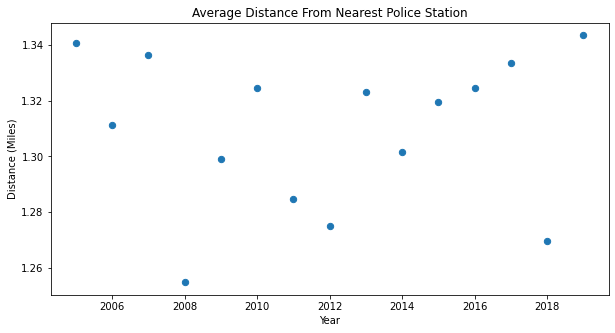

In [88]:
plt.figure(figsize=(10,5))
datalist = []
x = years
for data in final.values():
    datalist.append(data)
y = datalist
plt.title("Average Distance From Nearest Police Station")
plt.xlabel("Year")
plt.ylabel("Distance (Miles)")
plt.scatter(x,y,s = 40)
plt.show()